Step 1: Loading all the libraies nesssary to perform the work


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
k_fold = KFold(n_splits=10, shuffle=True, random_state=0) 

Step 2: Load in the dataset in a dataframe


In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


Step 3: Since the Churn is non-numerical, Convert the column to numerical values


In [3]:
churn_mapping_values = {"No": 0, "Yes": 1}
df.replace({'Churn':churn_mapping_values}, inplace=True)

#Step 3b, checking if it work
df.head(20)

C:\Users\Tedg2\AppData\Local\Temp\ipykernel_25736\2384326985.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Churn':churn_mapping_values}, inplace=True)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,0
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,0
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0


Step 4: Checking null spaces


In [4]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Step 5: changing all categorical column to numerical column


In [5]:
gender_mapping_values = {"Male": 0, "Female": 1}
partner_mapping_values = {"No": 0, "Yes": 1}
Dependents_mapping_values = {"No": 0, "Yes": 1}
PhoneService_mapping_values = {"No": 0, "Yes": 1}
MultipleLines_mapping_values = {"No phone service": 0,"No": 1, "Yes": 2}
InternetService_mapping_values = {"No":0,"DSL": 1, "Fiber optic": 2}
OnlineSecurity_mapping_values = {"No internet service":0,"No": 1, "Yes": 2}
OnlineBackup_mapping_values = {"No internet service":0,"No": 1, "Yes": 2}
DeviceProtection_mapping_values = {"No internet service":0,"No": 1, "Yes": 2}
OnlineSecurity_mapping_values = {"No internet service":0,"No": 1, "Yes": 2}
StreamingTV_mapping_values = {"No internet service":0,"No": 1, "Yes": 2}
TechSupport_mapping_values = {"No internet service":0,"No": 1, "Yes": 2}
StreamingMovies_mapping_values = {"No internet service":0,"No": 1, "Yes": 2}
Contract_mapping_values = {"Month-to-month": 0, "One year": 1,"Two year": 2}
PaperlessBilling_mapping_values = {"No": 0, "Yes": 1}
PaymentMethod_mapping_values = {"Mailed check": 0, "Electronic check": 1,"Bank transfer (automatic)": 2,"Credit card (automatic)": 3}


df.replace({'gender':gender_mapping_values}, inplace=True)
df.replace({'Partner':partner_mapping_values}, inplace=True)
df.replace({'Dependents':Dependents_mapping_values}, inplace=True)
df.replace({'PhoneService':PhoneService_mapping_values}, inplace=True)
df.replace({'MultipleLines':MultipleLines_mapping_values}, inplace=True)
df.replace({'InternetService':InternetService_mapping_values}, inplace=True)
df.replace({'OnlineSecurity':OnlineSecurity_mapping_values}, inplace=True)
df.replace({'OnlineBackup':OnlineBackup_mapping_values}, inplace=True)
df.replace({'DeviceProtection':DeviceProtection_mapping_values}, inplace=True)
df.replace({'StreamingTV':StreamingTV_mapping_values}, inplace=True)
df.replace({'TechSupport':TechSupport_mapping_values}, inplace=True)
df.replace({'StreamingMovies':StreamingMovies_mapping_values}, inplace=True)
df.replace({'Contract':Contract_mapping_values}, inplace=True)
df.replace({'PaperlessBilling':PaperlessBilling_mapping_values}, inplace=True)
df.replace({'PaymentMethod':PaymentMethod_mapping_values}, inplace=True)

df.head(50)

C:\Users\Tedg2\AppData\Local\Temp\ipykernel_25736\1108338141.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'gender':gender_mapping_values}, inplace=True)
C:\Users\Tedg2\AppData\Local\Temp\ipykernel_25736\1108338141.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Partner':partner_mapping_values}, inplace=True)
C:\Users\Tedg2\AppData\Local\Temp\ipykernel_25736\1108338141.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the ol

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,0,1,1,...,1,1,1,1,0,1,1,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,1,1,2,...,2,1,1,1,1,0,0,56.95,1889.5,0
2,3668-QPYBK,0,0,0,0,2,1,1,1,2,...,1,1,1,1,0,1,0,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,0,1,2,...,2,2,1,1,1,0,2,42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,1,2,1,...,1,1,1,1,0,1,1,70.70,151.65,1
5,9305-CDSKC,1,0,0,0,8,1,2,2,1,...,2,1,2,2,0,1,1,99.65,820.5,1
6,1452-KIOVK,0,0,0,1,22,1,2,2,1,...,1,1,2,1,0,1,3,89.10,1949.4,0
7,6713-OKOMC,1,0,0,0,10,0,0,1,2,...,1,1,1,1,0,0,0,29.75,301.9,0
8,7892-POOKP,1,0,1,0,28,1,2,2,1,...,2,2,2,2,0,1,1,104.80,3046.05,1
9,6388-TABGU,0,0,0,1,62,1,1,1,2,...,1,1,1,1,1,0,2,56.15,3487.95,0


Step 6: Checking the correlation between all variables and the "Churn"


In [6]:
df.corr(numeric_only=True).abs()[["Churn"]]

,Churn
gender,0.008612
SeniorCitizen,0.150889
Partner,0.150448
Dependents,0.164221
tenure,0.352229
PhoneService,0.011942
MultipleLines,0.036310
InternetService,0.316846
OnlineSecurity,0.023309
OnlineBackup,0.074205


Step 7: Droping the customerID column to due to it being uneesary since we still have a column that index each customer data and customerID is a reducted 

In [7]:
features2drop = ["customerID"]  
df = df.drop(features2drop, axis=1)
df.head(20)
numeric_cols = df.select_dtypes(include='number').columns.drop('Churn')

Step 8: Taking the correlation data and creating a few graph to visualing it to see the difference between the "Churn" and other columns. Creae a barplot and histplot graphs

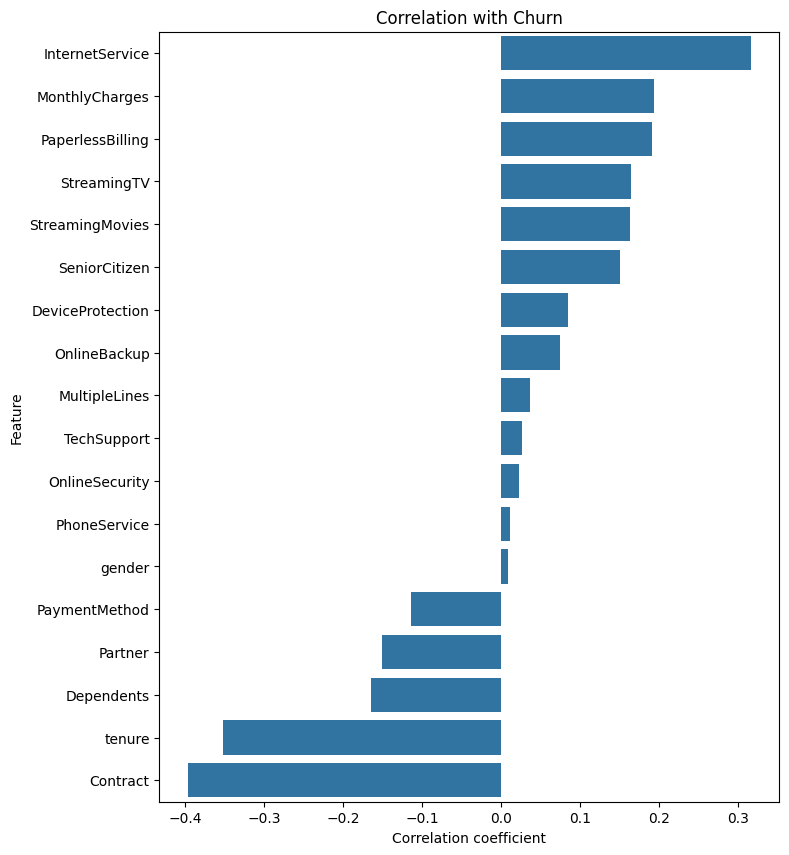

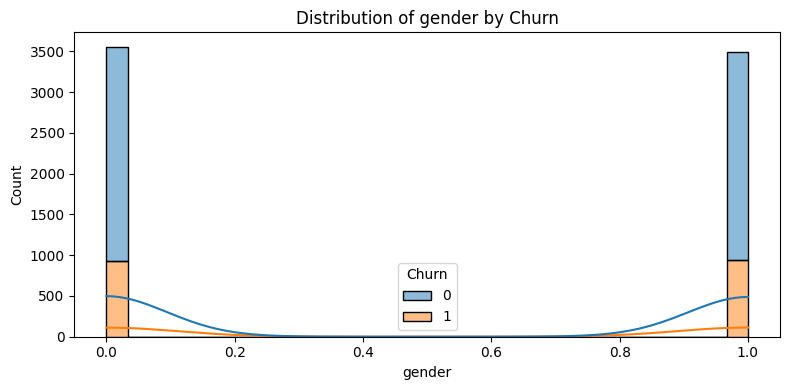

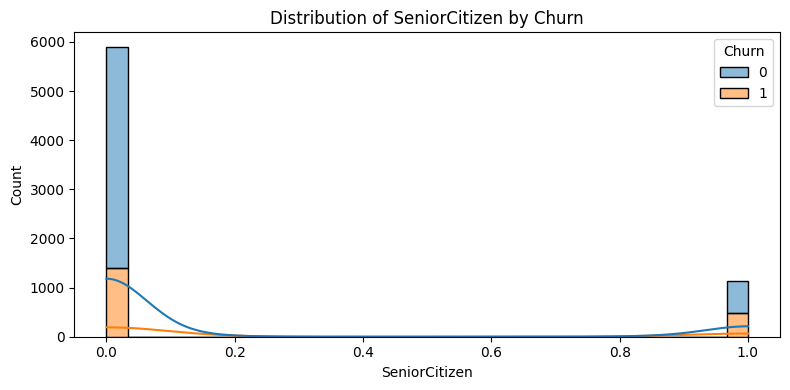

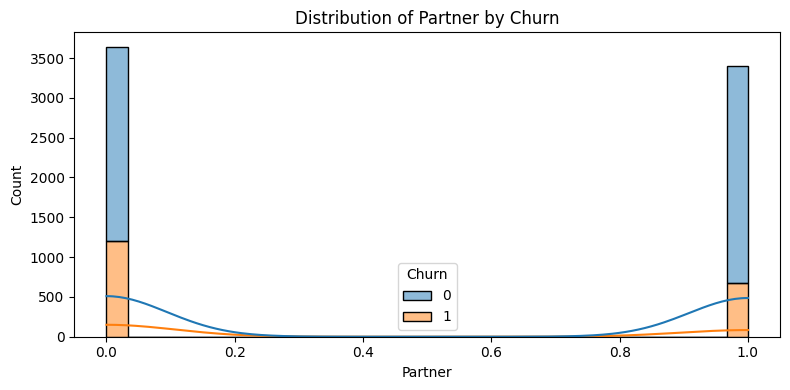

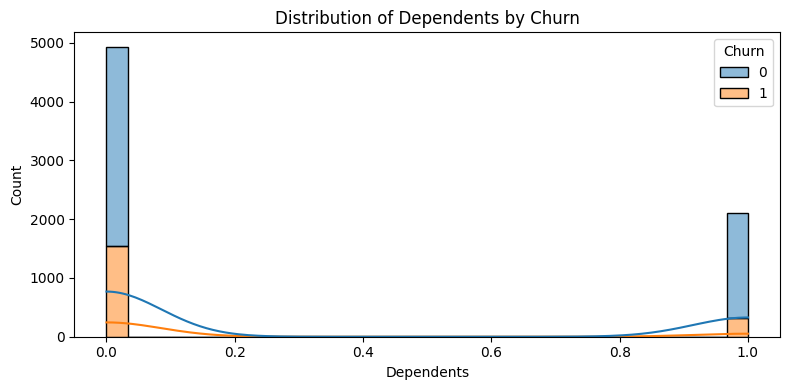

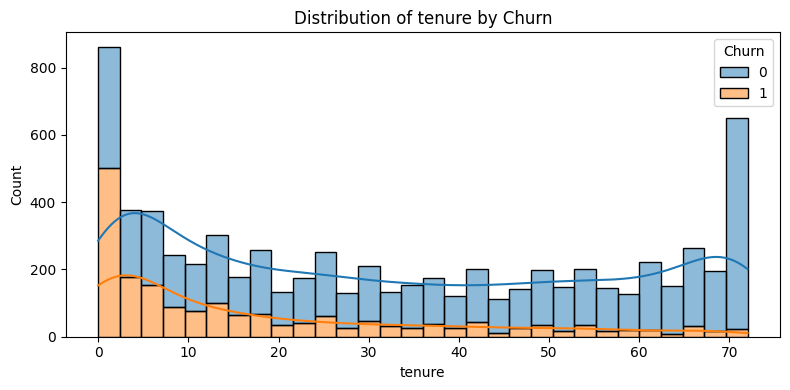

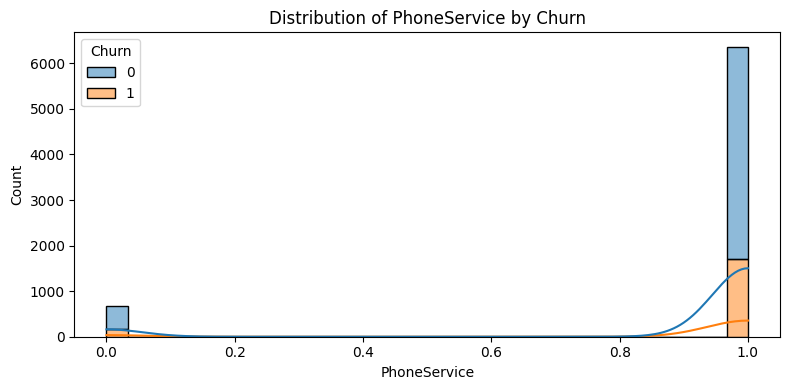

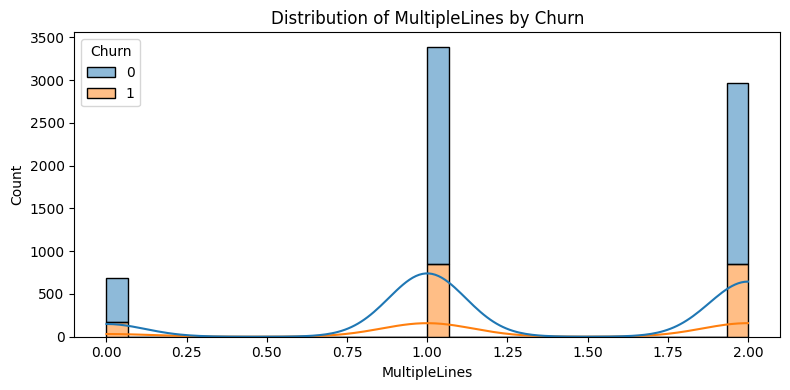

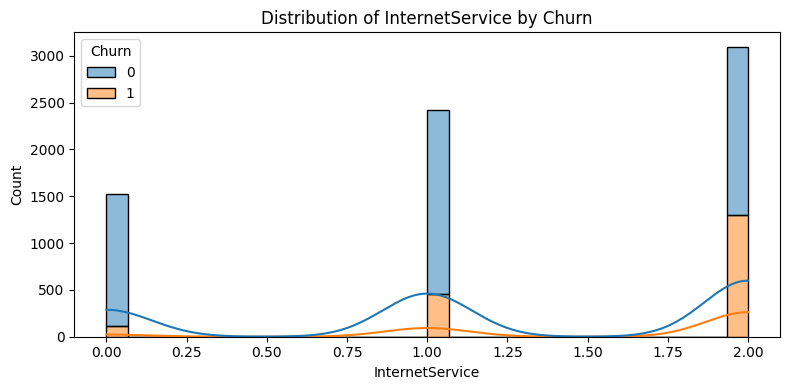

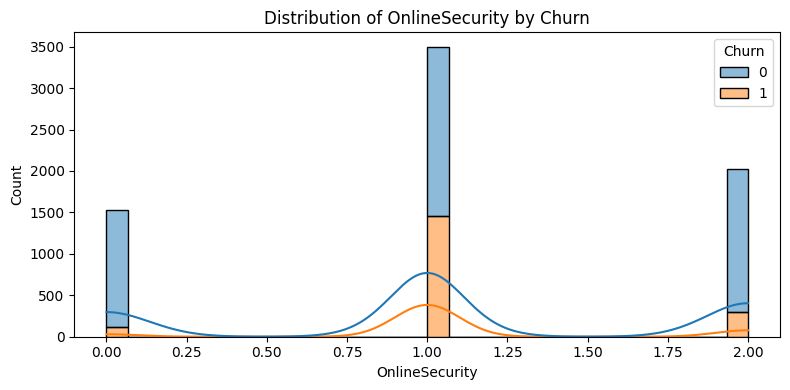

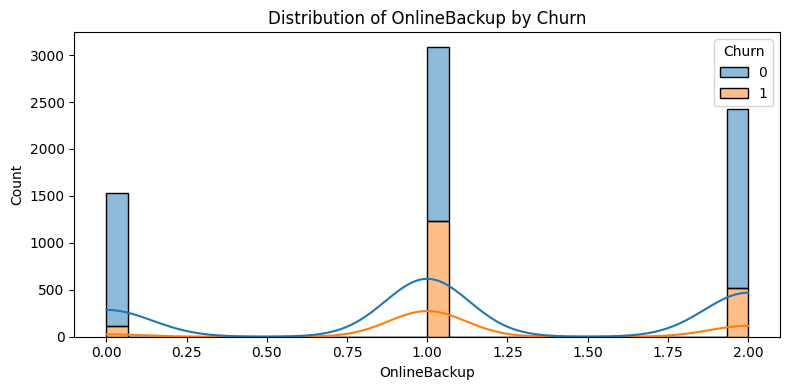

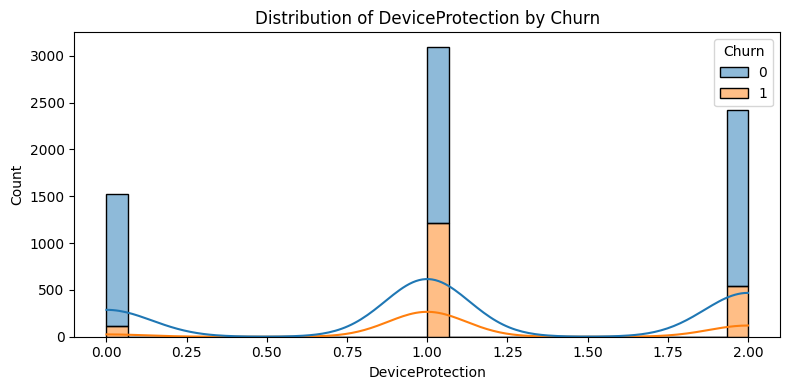

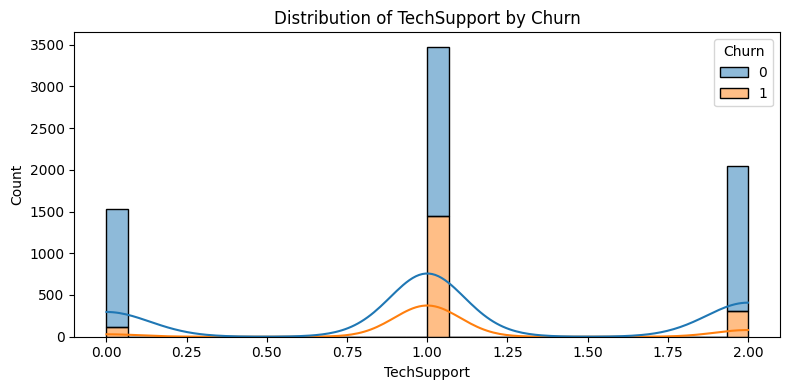

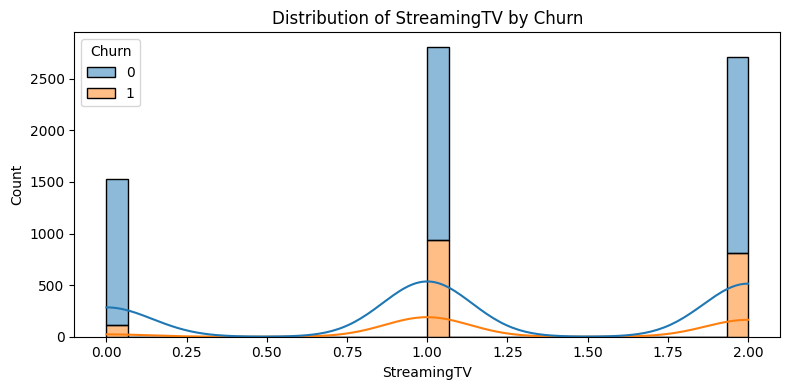

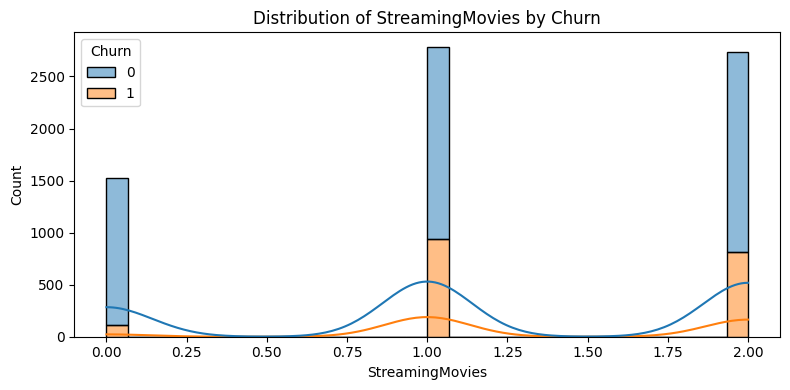

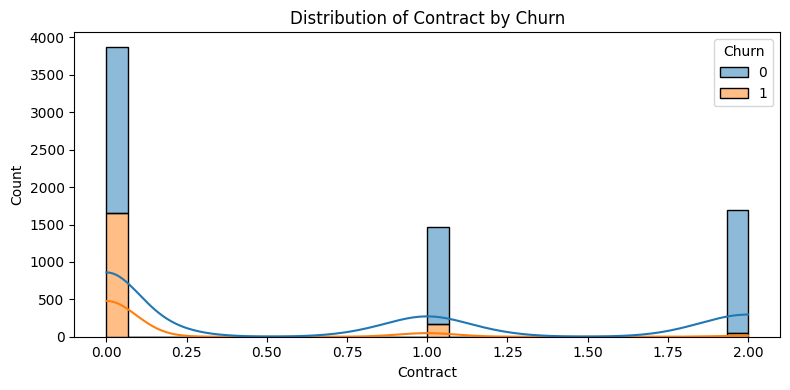

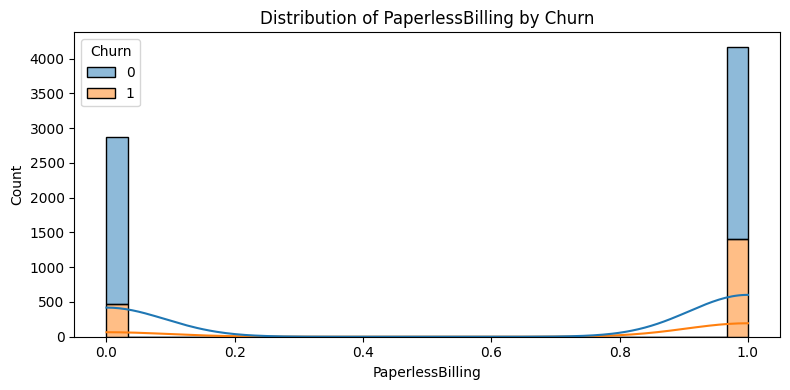

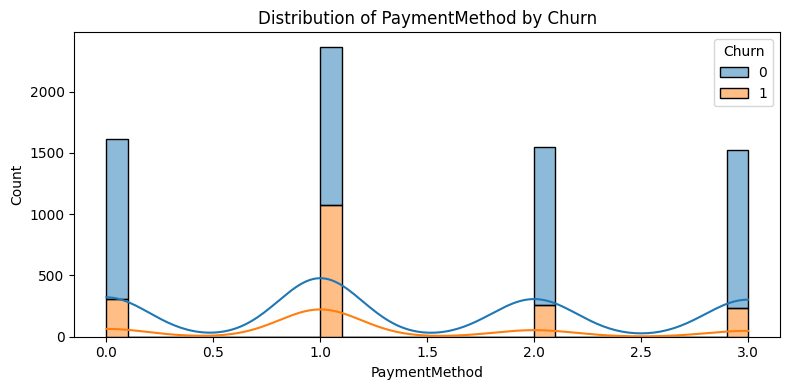

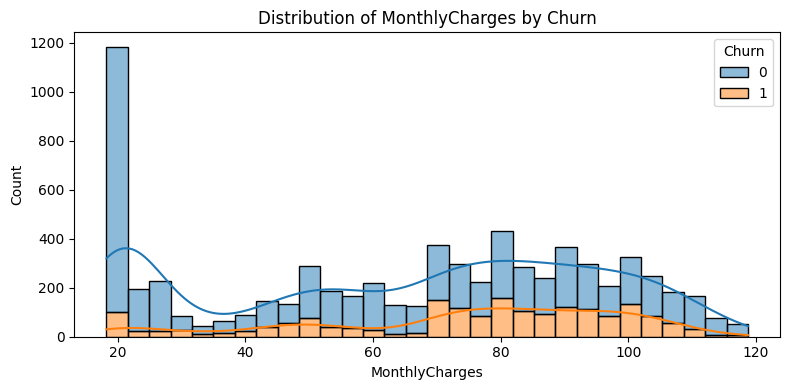

In [8]:
corr = df.corr(numeric_only=True)['Churn'].drop('Churn').sort_values(ascending=False)

plt.figure(figsize=(8, 10))
sns.barplot(x=corr.values, y=corr.index)
plt.title('Correlation with Churn')
plt.xlabel('Correlation coefficient')
plt.ylabel('Feature')
plt.show()

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, hue="Churn", kde=True, multiple="stack", bins=30)
    plt.title(f"Distribution of {col} by Churn")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


Step 9, Dropping columns that have less than 10% correlation to "Churn"  and checking the correlation between the columns and null value again



In [9]:
features2drop = ["gender","PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup","DeviceProtection","TechSupport" ]  
df = df.drop(features2drop, axis=1)
df.head(20)

,SeniorCitizen,Partner,Dependents,tenure,InternetService,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,1,1,1,0,1,1,29.85,29.85,0
1,0,0,0,34,1,1,1,1,0,0,56.95,1889.5,0
2,0,0,0,2,1,1,1,0,1,0,53.85,108.15,1
3,0,0,0,45,1,1,1,1,0,2,42.30,1840.75,0
4,0,0,0,2,2,1,1,0,1,1,70.70,151.65,1
5,0,0,0,8,2,2,2,0,1,1,99.65,820.5,1
6,0,0,1,22,2,2,1,0,1,3,89.10,1949.4,0
7,0,0,0,10,1,1,1,0,0,0,29.75,301.9,0
8,0,1,0,28,2,2,2,0,1,1,104.80,3046.05,1
9,0,0,1,62,1,1,1,1,0,2,56.15,3487.95,0


In [10]:
#Step 9b: Checking the correelation of the current set of column with "Chrun"
df.corr(numeric_only=True).abs()[["Churn"]].sort_values(by="Churn", ascending=False)


,Churn
Churn,1.000000
Contract,0.396713
tenure,0.352229
InternetService,0.316846
MonthlyCharges,0.193356
PaperlessBilling,0.191825
StreamingTV,0.164673
Dependents,0.164221
StreamingMovies,0.163220
SeniorCitizen,0.150889


In [11]:
#Step 9c  checking null values
df.isnull().sum()


SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
InternetService     0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

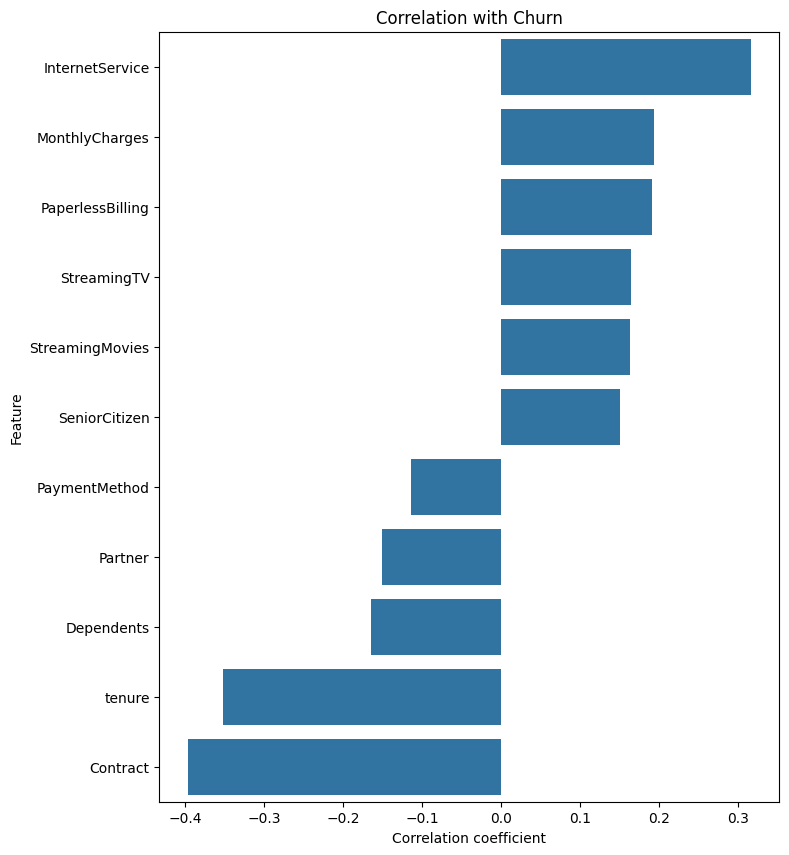

In [12]:
#Step 9d, visualzing correlation
numeric_cols = df.select_dtypes(include='number').columns.drop('Churn')

corr = df.corr(numeric_only=True)['Churn'].drop('Churn').sort_values(ascending=False)

plt.figure(figsize=(8, 10))
sns.barplot(x=corr.values, y=corr.index)
plt.title('Correlation with Churn')
plt.xlabel('Correlation coefficient')
plt.ylabel('Feature')
plt.show()

Step 10: Split the dataset to a 80% 20% set where I use one for training and the other for testing


In [13]:
x = df.drop("Churn", axis=1)
y = df["Churn"]
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 0)

Step 11: Checking object types for eachcolumns to ensure that either integers or float 

In [14]:
print(x_train.dtypes)


SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
InternetService       int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges         object
dtype: object


In [15]:
print(x_test.dtypes)


SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
InternetService       int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges         object
dtype: object


In [16]:
print(y_train.dtypes)


int64


In [17]:
print(y_test.dtypes)

int64


Step 11b: Changing all columns to floats and?integers to ensure model can process the information

In [18]:
x_train = x_train.apply(pd.to_numeric, errors = "coerce")
x_test = x_test.apply(pd.to_numeric, errors = "coerce")

x_train = x_train.fillna(0)
x_test = x_test.fillna(0)

#features = train.drop("Churn", axis = 1)
print(x_train.dtypes)
print(x_test.dtypes)


SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
InternetService       int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
dtype: object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
InternetService       int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
dtype: object


Step 12: Training the first Model- KNN algorithm and the accurate score from the training data


In [19]:
K_alogorthim = KNeighborsClassifier(n_neighbors =13)
scoring = "accuracy"
score = cross_val_score(K_alogorthim, x_train, y_train, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)
useable_score = round(np.mean(score)*100, 2)
print(f'Our KNN classifier score is {useable_score} %')

[0.7748227  0.77659574 0.81028369 0.79432624 0.80284192 0.75133215
 0.78152753 0.78507993 0.76376554 0.78685613]
Our KNN classifier score is 78.27 %


Step 13: Testing the KNN model with the test and seeing the auuracy of the results


In [20]:
K_alogorthim.fit(x_train,y_train)
prediction = K_alogorthim.predict(x_test)
accuracy_score1 = accuracy_score(y_test, prediction)
act_score = round(np.mean(accuracy_score1)*100, 2)
print(f"Accuracy of our results from the KNN model: {act_score} %" )


Accuracy of our results from the KNN model: 76.93 %


Step 14: Training the another Model- DecisionTree algorithm and the accurate score from the training data


In [21]:
clf2 = DecisionTreeClassifier()
scoring = 'accuracy'
score2 = cross_val_score(clf2, x_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score2)
scoreP = round(np.mean(score2)*100, 2)
print('The Decision Tree classifier score is ' + str(scoreP) + '%')

[0.7464539  0.7570922  0.74113475 0.7322695  0.72291297 0.70159858
 0.71758437 0.71936057 0.75133215 0.72824156]
The Decision Tree classifier score is 73.18%


Step 15: Testing the Decision Tree model with the test and seeing the accuracy of the results

In [22]:
clf2.fit(x_train, y_train)

prediction2 = clf2.predict(x_test)
accuracy_score2 = accuracy_score(y_test, prediction2)
act_score2 = round(np.mean(accuracy_score2)*100, 2)

print(f"Accuracy of our results from the Decision Tree model: {act_score2} %" )


Accuracy of our results from the Decision Tree model: 71.04 %
